<a href="https://colab.research.google.com/github/Kingo03/Kingo03/blob/main/DL5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np


# Load the dataset
train_df = pd.read_csv('/content/train.csv')
test_df = pd.read_csv('/content/test.csv')

# Preprocess the data
# Convert categorical variables into numerical variables
train_df['sex'] = train_df['sex'].map({'male': 0, 'female': 1})
test_df['Sex'] = test_df['Sex'].map({'male': 0, 'female': 1})

# Fill missing values in 'Age'
train_df['age'].fillna(train_df['age'].mean(), inplace=True)
test_df['Age'].fillna(test_df['Age'].mean(), inplace=True)

# Define features and target
X = train_df[['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare']]
y = train_df['survived']

# Convert column names to lowercase
X.columns = X.columns.str.lower()
test_df.columns = test_df.columns.str.lower()

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Verify columns
print("Training features:", X.columns.tolist())
print("Test features:", test_df.columns.tolist())

# Build the model
model = Sequential([
    Dense(64, activation='relu', input_shape=(6,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_data=(X_val_scaled, y_val))

# Scale the test data
test_df = test_df[['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare']]
test_scaled = scaler.transform(test_df)

# Make predictions on the test set
predictions = model.predict(test_scaled)

# Convert predictions to binary (0 or 1)
binary_predictions = np.where(predictions > 0.5, 1, 0)

# Save predictions
submission_df = pd.DataFrame({'PassengerId': test_df.index + 892, 'Survived': binary_predictions.flatten()})
submission_df.to_csv('submission.csv', index=False)


Training features: ['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare']
Test features: ['passengerid', 'pclass', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket', 'fare', 'cabin', 'embarked']
Epoch 1/10


<ipython-input-12-59b41385e20b>:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['age'].fillna(train_df['age'].mean(), inplace=True)
<ipython-input-12-59b41385e20b>:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6890 - loss: 0.6308 - val_accuracy: 0.8156 - val_loss: 0.5197
Epoch 2/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7760 - loss: 0.5138 - val_accuracy: 0.8045 - val_loss: 0.4473
Epoch 3/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7969 - loss: 0.4559 - val_accuracy: 0.7989 - val_loss: 0.4225
Epoch 4/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8051 - loss: 0.4347 - val_accuracy: 0.8156 - val_loss: 0.4165
Epoch 5/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8149 - loss: 0.4329 - val_accuracy: 0.8156 - val_loss: 0.4140
Epoch 6/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8213 - loss: 0.4169 - val_accuracy: 0.8156 - val_loss: 0.4134
Epoch 7/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8375 - loss: 0.3864 - val_accuracy: 0.8156 - val_loss: 0.4128
Epoch 8/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8127 - loss: 0.4162 - val_accuracy: 0.8156 - val_loss: 0.4138
Ep

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


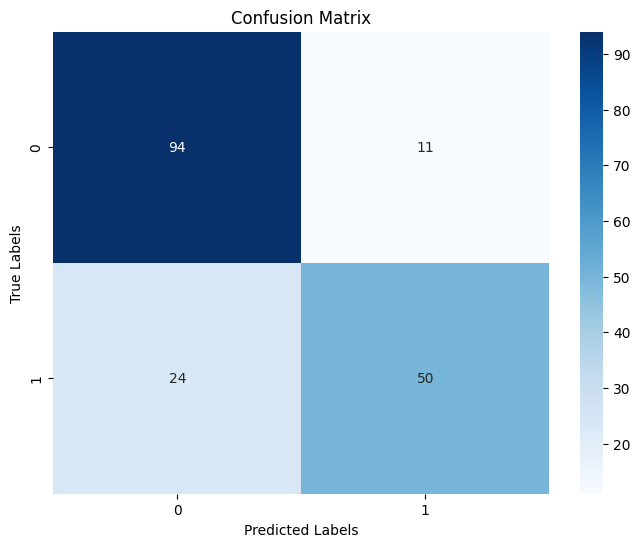

In [14]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Predict on validation set
y_pred = model.predict(X_val_scaled).round()

# Create confusion matrix
cm = confusion_matrix(y_val, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8106 - loss: 0.4108 


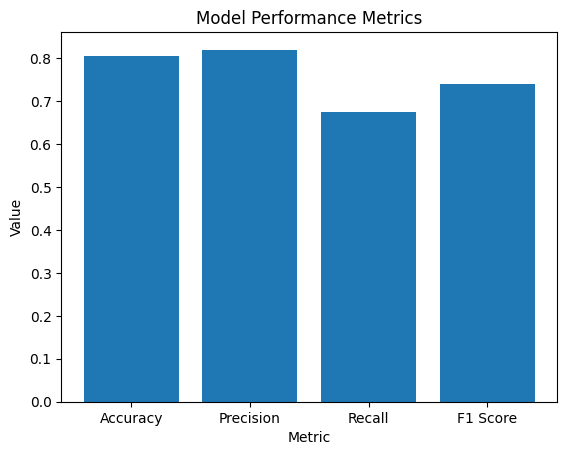

In [13]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score

# Predict on validation set
y_pred = model.predict(X_val_scaled).round()

# Calculate metrics
accuracy = model.evaluate(X_val_scaled, y_val)[1]
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1_score_val = f1_score(y_val, y_pred)

# Lists for plotting
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [accuracy, precision, recall, f1_score_val]

# Plot metrics
plt.bar(metrics, values)
plt.xlabel('Metric')
plt.ylabel('Value')
plt.title('Model Performance Metrics')
plt.show()
